Mục đích: Phân tích dữ liệu sau khi xử lý outlier

In [2]:
# 3.1. Import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Cài đặt hiển thị
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
pd.set_option('display.width', 200)         # Giãn bề ngang bảng

In [3]:
# 3.2. Đọc dữ liệu sau khi xử lý
df = pd.read_csv("E:/2. Project/Data/credit_risk_capp.csv")

In [4]:
# 3.3. Kiểm tra loại dữ liệu
print(df.dtypes)

rev_util             float64
age                    int64
late_30_59             int64
debt_ratio           float64
monthly_inc            int64
open_credit            int64
late_90                int64
real_estate            int64
late_60_89             int64
dependents             int64
dlq_2yrs               int64
debt_ratio_capped    float64
rev_util_capped      float64
dtype: object


In [5]:
# 3.4. Thống kê mô tả các biến numeric
numeric_col = ['age', 'monthly_inc', 'dependents','open_credit','real_estate', 'rev_util_capped', 'debt_ratio_capped', 'late_30_59', 'late_60_89', 'late_90', 'dlq_2yrs']
var_statis = df[numeric_col].describe()
print(var_statis)

                age    monthly_inc    dependents   open_credit   real_estate  rev_util_capped  debt_ratio_capped    late_30_59    late_60_89       late_90      dlq_2yrs
count  16714.000000   16714.000000  16714.000000  16714.000000  16714.000000     16714.000000       16714.000000  16714.000000  16714.000000  16714.000000  16714.000000
mean      48.798672    6118.120258      0.944358      8.503709      1.047445         0.488501           0.377011      1.110267      0.734354      0.863827      0.500000
std       13.906078    5931.841779      1.198791      5.370965      1.272565         0.389333           0.285846      7.172890      7.138737      7.167576      0.500015
min       21.000000       0.000000      0.000000      0.000000      0.000000         0.000000           0.000000      0.000000      0.000000      0.000000      0.000000
25%       38.000000    3128.500000      0.000000      5.000000      0.000000         0.080000           0.160000      0.000000      0.000000      0.000000 

In [6]:
# 3.5. Xác định tương quan giữa các nhóm biến

# Phân loại nhóm biến
nhan_khau_hoc = ["age", "monthly_inc", "dependents"]
ho_so_td = ["open_credit", "real_estate", "debt_ratio_capped", "rev_util_capped"]
hanh_vi_tra_no = ["late_30_59", "late_60_89", "late_90"]

groups = {
    "nhan_khau_hoc": nhan_khau_hoc,
    "ho_so_td": ho_so_td,
    "hanh_vi_tra_no": hanh_vi_tra_no
}

# Tính tương quan tuyệt đối trung bình với dlq_2yrs
group_corr = {}

for group_name, cols in groups.items():
    corr_vals = df[cols + ["dlq_2yrs"]].corr()["dlq_2yrs"].drop("dlq_2yrs")
    group_corr[group_name] = corr_vals.abs().mean()  # lấy giá trị tuyệt đối & trung bình

result = pd.DataFrame.from_dict(group_corr, orient="index", columns=["mean_abs_corr"])
print(result.sort_values("mean_abs_corr", ascending=False))

                mean_abs_corr
ho_so_td             0.159843
nhan_khau_hoc        0.126466
hanh_vi_tra_no       0.104432


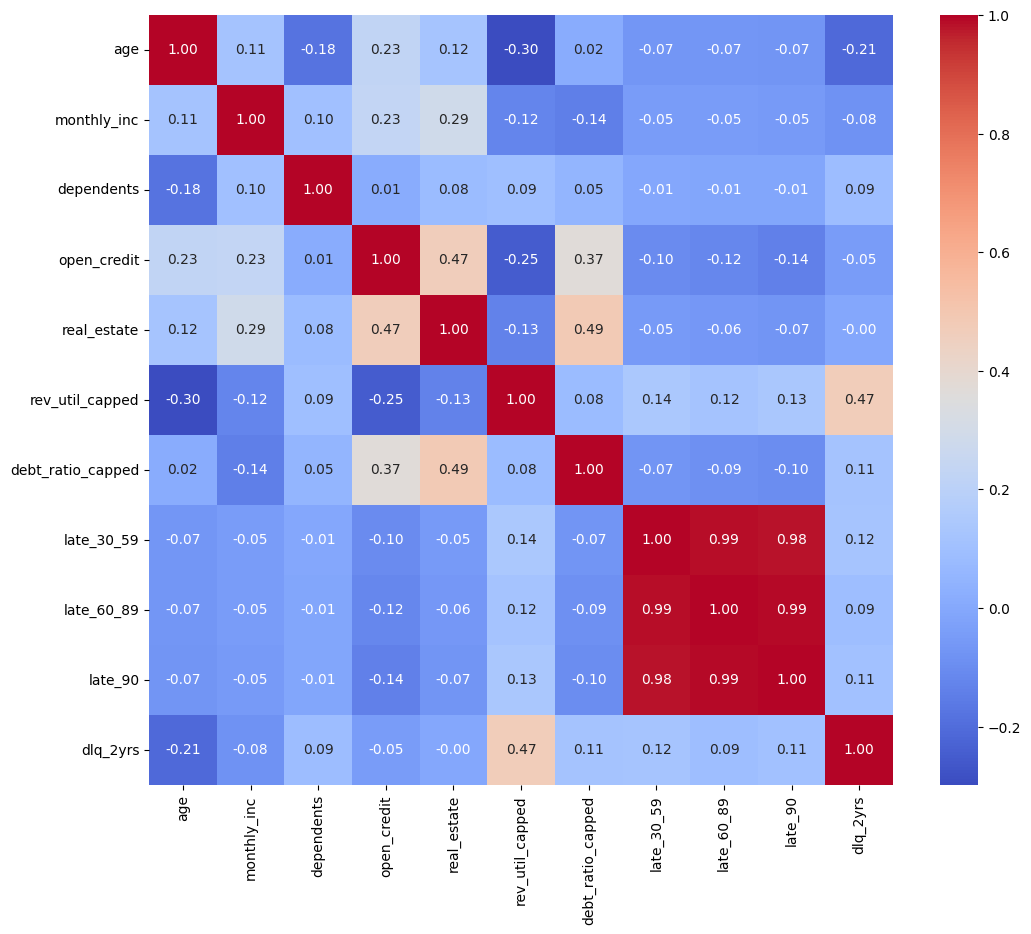

In [7]:
# 3.6. Xác định tương quan giữa các biến
corr_matrix = df[numeric_col].corr()  # Tính correlation giữa tất cả biến

# Hiển thị biểu đồ tương quan
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

In [8]:
# 3.7. Xác định tương quan giữa bins của các biến với biến phụ thuộc  => Trình bày bằng Power BI

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from itertools import combinations
import statsmodels.api as sm

In [10]:
# 3.8. Kiểm tra hiện tượng đa cộng tuyến

# Các biến độc lập numeric
inde_var = ['age', 'monthly_inc', 'dependents','open_credit','real_estate', 'rev_util_capped', 'debt_ratio_capped', 'late_30_59', 'late_60_89', 'late_90']
x = df[inde_var]
x_const = add_constant(x)   # Thêm constant để tính VIF

# Tạo dataframe VIF
vif_data = pd.DataFrame()
vif_data['variable'] = x_const.columns
vif_data['VIF'] = [variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]

print(vif_data)

             variable        VIF
0               const  23.556595
1                 age   1.168948
2         monthly_inc   1.303365
3          dependents   1.060821
4         open_credit   1.530638
5         real_estate   1.723489
6     rev_util_capped   1.250794
7   debt_ratio_capped   1.661164
8          late_30_59  47.323587
9          late_60_89  84.516924
10            late_90  59.206557


Danh sách biến độc lập:
['age', 'monthly_inc', 'dependents', 'open_credit', 'real_estate', 'rev_util_capped', 'debt_ratio_capped', 'late_90', 'late_30_59', 'late_60_89']
Top 10 nhóm biến mạnh nhất với dlq_2yrs:
                                            Variables  Correlation
35               (rev_util_capped, debt_ratio_capped)     0.431577
120  (dependents, rev_util_capped, debt_ratio_capped)     0.237911
19                      (dependents, rev_util_capped)     0.221986
5                            (age, debt_ratio_capped)    -0.208249
3                                  (age, real_estate)    -0.207954
1                                   (age, dependents)    -0.205680
67              (age, real_estate, debt_ratio_capped)    -0.205359
56               (age, dependents, debt_ratio_capped)    -0.203182
54                     (age, dependents, real_estate)    -0.202815
2                                  (age, open_credit)    -0.199577


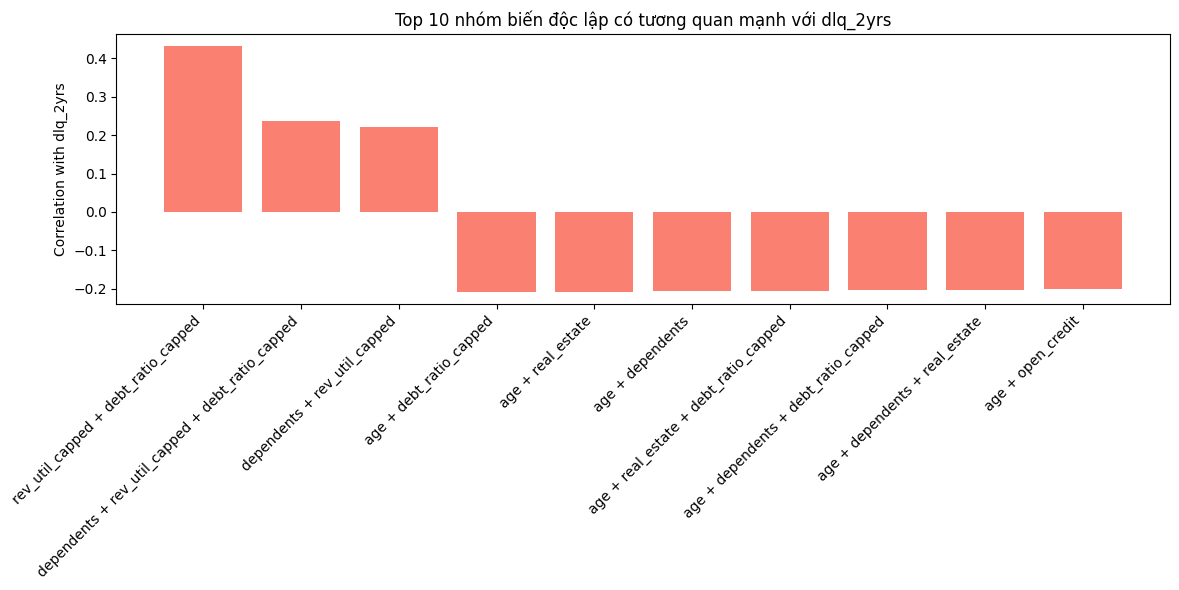

In [11]:
# 3.9. Xác định tác động của đa biến độc lập đến biến phụ thuộc

dependent_var = 'dlq_2yrs' 
indep_vars = ['age', 'monthly_inc', 'dependents','open_credit','real_estate', 'rev_util_capped', 'debt_ratio_capped', 'late_90', 'late_30_59', 'late_60_89']

print("Danh sách biến độc lập:")
print(indep_vars)

# Hàm tìm top nhóm biến theo tương quan
def find_strong_combinations(vars_list, df, dependent_var, min_len=2, max_len=3, top_n=10):
    """
    Tìm các nhóm biến độc lập có tương quan mạnh với biến phụ thuộc
    min_len, max_len: độ dài nhóm (2=cặp, 3=bộ 3)
    top_n: số nhóm mạnh nhất muốn lấy
    """
    results = []
    for r in range(min_len, max_len+1):
        for combo in combinations(vars_list, r):
            # Gộp biến bằng tổng, có thể thay bằng mean
            new_var = df[list(combo)].sum(axis=1)
            corr = new_var.corr(df[dependent_var])
            results.append([combo, corr])
    
    results_df = pd.DataFrame(results, columns=['Variables','Correlation'])
    results_df = results_df.reindex(results_df['Correlation'].abs().sort_values(ascending=False).index)
    
    return results_df.head(top_n)

# Tìm top nhóm biến
top_groups = find_strong_combinations(indep_vars, df, dependent_var, min_len=2, max_len=3, top_n=10)
print("Top 10 nhóm biến mạnh nhất với dlq_2yrs:")
print(top_groups)

# Vẽ bar chart 
plt.figure(figsize=(12,6))
labels = [' + '.join(vars) for vars in top_groups['Variables']]
values = top_groups['Correlation']

plt.bar(labels, values, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation with dlq_2yrs')
plt.title('Top 10 nhóm biến độc lập có tương quan mạnh với dlq_2yrs')
plt.tight_layout()
plt.show()

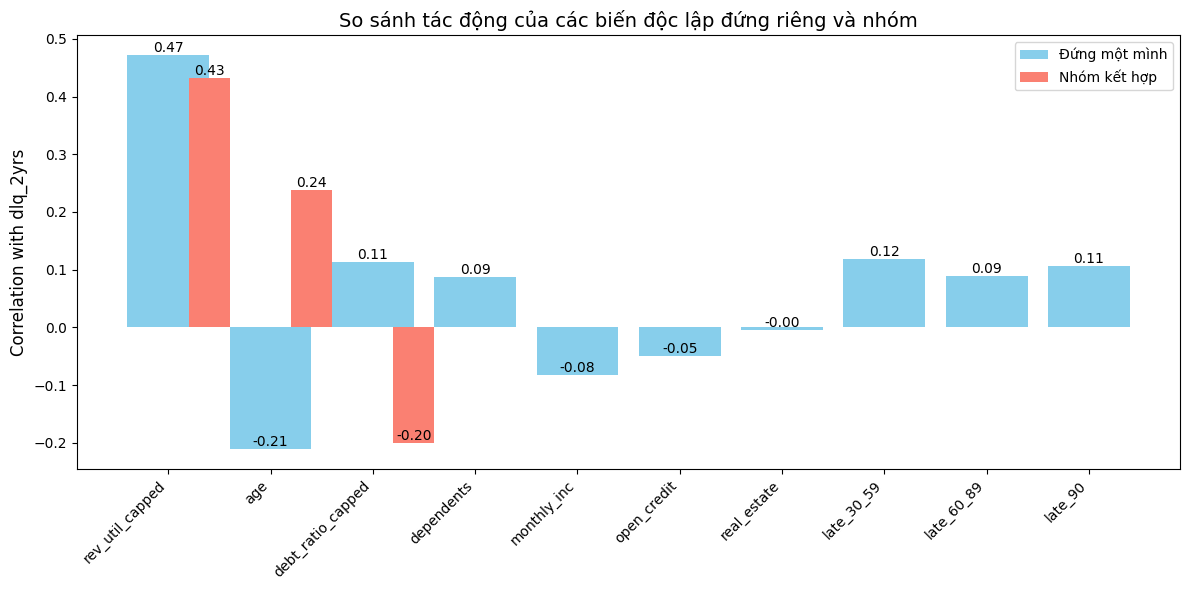

In [12]:
# 3.9. So sánh tác động của các biến độc lập khi đứng riêng và khi đứng theo nhóm

# Dữ liệu 
single_vars = ['rev_util_capped', 'age', 'debt_ratio_capped', 'dependents', 
               'monthly_inc', 'open_credit', 'real_estate', 'late_30_59', 'late_60_89', 'late_90']
single_corr = [0.472, -0.211, 0.114, 0.087, -0.082, -0.049, -0.004, 0.118, 0.089, 0.106]

group_vars = ['(rev_util_capped, debt_ratio_capped)', 
              '(dependents, rev_util_capped, debt_ratio_capped)',
              'Nhóm có age + các biến khác']
group_corr = [0.432, 0.238, -0.20]

# Vẽ bar chart
plt.figure(figsize=(12,6))

# Vẽ bar tác động đứng một mình
bars1 = plt.bar(single_vars, single_corr, color='skyblue', label='Đứng một mình')

# Vẽ bar tác động nhóm (vẽ offset sang bên)
x_pos_group = [i + 0.4 for i in range(len(group_vars))]  # di chuyển sang bên
bars2 = plt.bar(x_pos_group, group_corr, color='salmon', width=0.4, label='Nhóm kết hợp')

# Hiển thị giá trị trên bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10, color='black')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Chỉnh xticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Correlation with dlq_2yrs', fontsize=12)
plt.title('So sánh tác động của các biến độc lập đứng riêng và nhóm', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()